In [32]:
import scipy
import numpy
import scipy.io
import matplotlib.pyplot as plt
import glob
import json
import math
import os
import subprocess
import tempfile
import numpy as np

In [33]:
def get_result(path):    
    logfile=open(path,'r')
    read_result=np.zeros((575,20)) # Undecided
    i=-1
    j=0
    for line in logfile.readlines():
        if i>=574:
            break
        if line.find("Starting the test.....")!=-1:
            i=i+1
            j=0
            continue
        if line=="not_exist\n":
            read_result[i,j]=0
            j=j+1
        if line=="10\n":
            read_result[i,j]=1
            j=j+1
        if line=="11\n":
            read_result[i,j]=2
            j=j+1  
    logfile.close()
    return read_result  

In [34]:
read_result=[]
read_result.append(get_result("E:/NYU/DynamoProject/rst711.txt"))
read_result.append(get_result("E:/NYU/DynamoProject/rst714.txt"))
# read_result.append(get_result("E:/NYU/DynamoProject/rst714_with_latency20.txt"))
# read_result.append(get_result("E:/NYU/DynamoProject/rst714_with_latency40.txt"))
read_result.append(get_result("E:/NYU/DynamoProject/rst713.txt"))
# # read_result.append(get_result("E:/NYU/DynamoProject/rst732.txt"))
read_result.append(get_result("E:/NYU/DynamoProject/rst741.txt"))
label=[]
label.append("(N,W,R)=(7,1,1)")
label.append("(N,W,R)=(7,1,4)")
label.append("(N,W,R)=(7,1,3)")
# label.append("latency=10")
# label.append("latency=20")
# label.append("latency=40")

# label.append("(N,W,R)=(7,3,2)")
label.append("(N,W,R)=(7,4,1)")

In [35]:
def sample_result(read_result):
    sample=np.zeros(read_result.shape[0])
    for i in range(read_result.shape[0]):
        k=0
        for j in range(read_result.shape[1]):
            if read_result[i,j] ==1:
                k=k+1
        sample[i]=k
    p_dis=np.zeros(21)
    for i in range(sample.shape[0]):
        p_dis[int(sample[i])]=p_dis[int(sample[i])]+1
    return p_dis

In [36]:
p_dis=[]
for i in range(len(read_result)):
    p_dis.append(sample_result(read_result[i]))

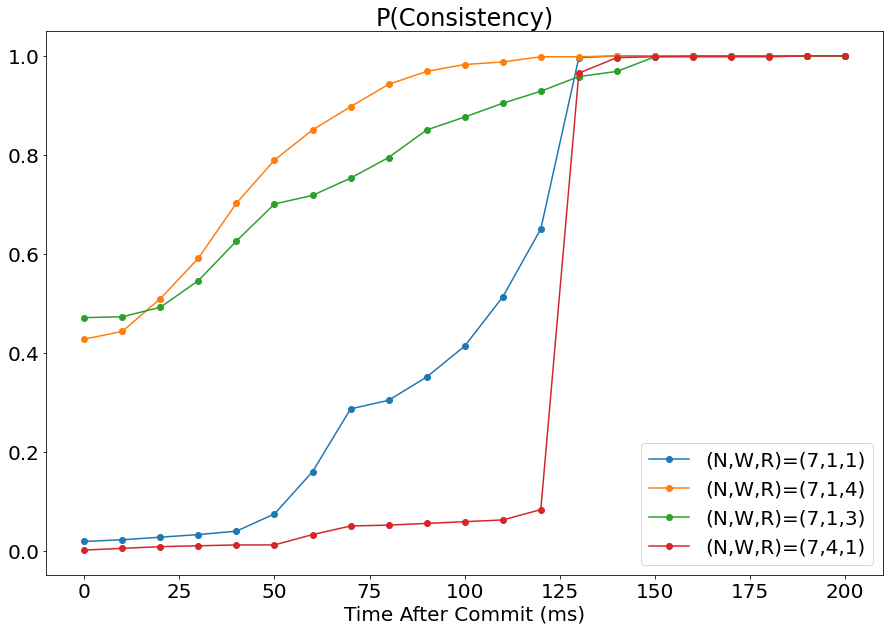

In [37]:
fig,ax=plt.subplots(1,1,figsize=(15,10)) 
x_data=np.arange(21)*10
for i in range(len(read_result)):
    y_data=np.zeros_like(p_dis[i])
    for j in range(y_data.shape[0]):
        y_data[j]=np.sum(p_dis[i][0:j+1])/np.sum(p_dis[i])
    ax.plot(x_data,y_data,label=label[i],marker='o')     

ax.set_xlabel("Time After Commit (ms)")
# ax.set_ylabel("P(Consistency)")
ax.set_title("P(Consistency)")
# ax.set_yscale("log")
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.rcParams.update({'font.size': 20}) # font size
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
ax.legend()